# Importing libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os
import re
from itertools import chain

In [4]:
from syllables import split2syllables

In [5]:
np.set_printoptions(linewidth=1000, precision=3, suppress=True)

In [6]:
split2syllables('привет').split('-')

['при', 'вет']

# Reading and syllabising a book

In [7]:
file_name = 'Dostoevskiy Fedor. Prestuplenie i nakazanie.txt'

In [8]:
with open(file_name) as f:
    text = f.read().lower()

In [9]:
print(text[:200])

ф. достоевский

преступление и наказание



роман в шести частях с эпилогом

вступительная статья и примечания г. фридлендера

иллюстрации д. шмаринова





«преступление и наказание» достоевского


1


Getting rid of redundant symbols and repetitions

In [10]:
text = re.sub(r'[^А-Яа-я\.\!\?\-\:\;\n\ ]', '', text)
text = re.sub("\n+", ". ", text)
text = re.sub("\.+ ", ". ", text)

Splitting syllables into 1 dimensional lists

In [11]:
len(text)

1141760

In [12]:
split_text = re.findall(r'\w+|[^\w\s]| ', text)
text_to_syllables = list(
    chain.from_iterable(
        list(map(lambda x: split2syllables(x).split('-') if len(x) != 1 else x, split_text))
        )
)

List of unique syllables and symbols and their number

In [13]:
syllables, syllables_counts = np.unique(text_to_syllables,  return_counts=True)

In [14]:
len(syllables)

4194

In [15]:
syllables[:100]

array(['', ' ', '!', '-', '.', ':', ';', '?', 'а', 'ай', 'ак', 'ал', 'аль', 'ан', 'ар', 'ась', 'ах', 'б', 'ба', 'баб', 'баз', 'бак', 'бал', 'бам', 'бан', 'бар', 'бат', 'бать', 'бах', 'баш', 'ббо', 'бве', 'бвел', 'бви', 'бво', 'бвя', 'бда', 'бде', 'бду', 'бе', 'бег', 'бед', 'беж', 'без', 'бей', 'бел', 'бель', 'бен', 'бер', 'бес', 'бет', 'бже', 'бжег', 'бжи', 'бжо', 'би', 'бив', 'бид', 'бий', 'бил', 'биль', 'бин', 'бир', 'бирь', 'бит', 'бить', 'бишь', 'бка', 'бках', 'бке', 'бки', 'бкий', 'бким', 'бко', 'бкой', 'бкра', 'бку', 'бла', 'блась', 'бле', 'блев', 'блей', 'блем', 'блен', 'бли', 'близ', 'блик', 'блин', 'бло', 'блу', 'блю', 'блюд', 'блюсь', 'бля', 'блял', 'блям', 'блясь', 'блять', 'блях', 'бма'], dtype='<U7')

In [16]:
syllables_counts[:100]

array([  3121, 186266,   3279,   3555,  10953,    978,   1322,   2266,   2853,      4,      2,     10,     21,     40,     45,      1,     96,     75,    530,      2,      1,      9,     13,      3,      6,     11,      1,      1,     15,      1,      1,      1,      1,     42,      4,      3,      1,      2,     21,   1998,      2,      1,      2,    181,      6,      6,      9,     31,      3,      1,      1,      1,      1,      1,      1,    429,      3,      1,     91,    139,      3,      5,      1,      5,     37,     64,     14,     41,      2,      5,     14,      1,      2,     23,     23,      1,     25,    232,      1,    160,      2,     54,      1,      4,    142,      5,      3,      2,     18,      8,     78,      1,      1,     27,      3,      1,      2,      1,      2,     15], dtype=int64)

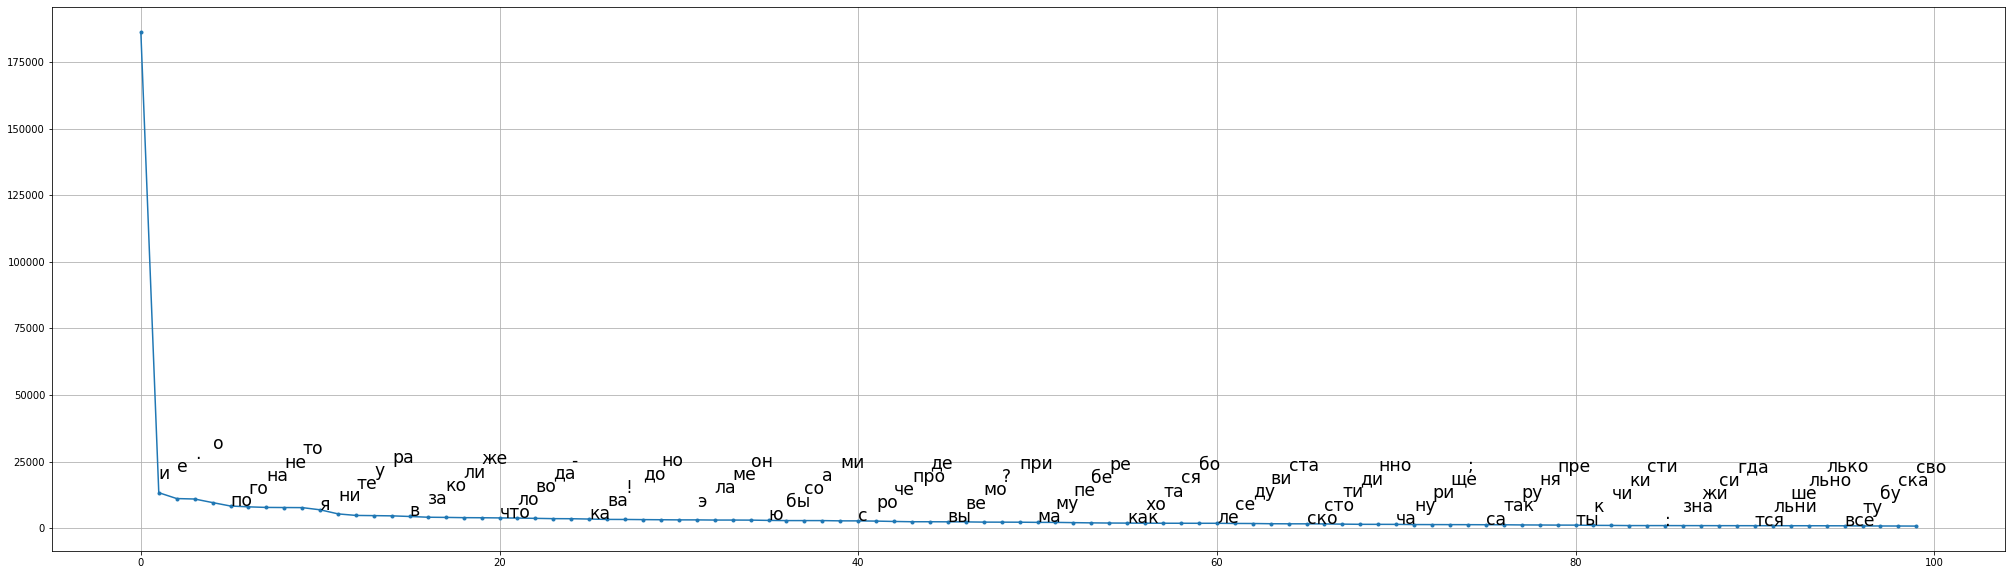

In [17]:
plt.figure(figsize=(35,10))

syllables_counts_sort_arg = np.argsort(syllables_counts)[::-1]
syllables_counts_sort = syllables_counts[syllables_counts_sort_arg]
syllables_sort = syllables[syllables_counts_sort_arg]

plt.plot(syllables_counts_sort[:100], '.-')

for i in range(100):
  plt.text(i, syllables_counts_sort[i]+(i%5)*5000, syllables_sort[i], size='xx-large')

plt.grid()

Encode and decode unique values

In [18]:
encoding_dict = {item: index for index, item in enumerate(syllables)}
encode_func = np.vectorize(lambda x: encoding_dict.get(x, 0))

In [19]:
decoding_dict = dict(enumerate(syllables))
decode_func = np.vectorize(lambda x: decoding_dict.get(x, 0))

In [20]:
text_to_syllables_encode = encode_func(text_to_syllables)
text_to_syllables_encode[:100]

array([3706,    4,  854, 3222, 1008,  470,    4,    1, 2392, 3255, 2329, 2155, 1008,    1, 1438,    1, 2077, 1453, 1152, 2155, 1008,    4,    1, 2720, 1948,    1,  249,    1, 4024, 3179,    1, 3893, 3280,    1, 2796,    1, 4169, 2300, 1761,  658,    4,    1,  512, 2300, 3422, 1840, 4180,    1, 3145, 3686,    1, 1438,    1, 2398, 1965, 3893, 2155, 4180,    1,  577,    4, 3735,  804, 2111, 2473,    4,    1, 1438, 1731, 3231, 3871, 1438,    1,  710,    4, 4084, 2646, 2190,  250,    4,    1, 2392, 3255, 2329, 2155, 1008,    1, 1438,    1, 2077, 1453, 1152, 2155, 1008,    1,  854, 3222, 1008,  474,  653])

In [21]:
syllables_n = len(syllables)

A = np.zeros((syllables_n, syllables_n))

In [22]:
for i in range(len(text_to_syllables_encode)-1):
    j = text_to_syllables_encode[i]
    k = text_to_syllables_encode[i+1]
    A[j][k] = A[j][k] + 1

In [23]:
pi = syllables_counts/syllables_counts.sum()
P = A/A.sum(axis=0)

In [24]:
P.shape

(4194, 4194)

In [25]:
story = []
pc = 20

pi0 = pi
for i in range(1, 50):
    # story.append(np.argmax(np.linalg.matrix_power(P.T, i) @ pi))

    pi0 = P.T @ pi0

    prob = np.sort(pi0)[-pc:]
    story.append(np.random.choice(np.argsort(pi0)[-pc:], p=prob/prob.sum()))

''.join(decode_func(story))

'вскрымнулрждалковькнетзькальтедусьштейзгнугонтльменрждалтусгкимтьевбьяковрдитьквиписьловгсятльменгайтльменрждалхенрждалхкохнозгнулкнешьковгсятусмлилтльмебьятьевписьлргскийргскийльгорргскомргскулргском'

In [26]:
for j in range(5, 80, 5):
    story = []
    pc = j

    pi0 = pi
    for i in range(1, 50):
        # story.append(np.argmax(np.linalg.matrix_power(P.T, i) @ pi))

        pi0 = P.T @ pi0

        prob = np.sort(pi0)[-pc:]
        story.append(np.random.choice(np.argsort(pi0)[-pc:], p=prob/prob.sum()))

    print(f'{j}:', ''.join(decode_func(story)))

5: вскримнулкнеттьямштейковптальловписьловгайловписьтьямгсяловгайквиписьтьямптальловздомловптальквикнетковздомтьямписьквиписьтьямписьловгайквикнешькерписьтьямзльгоррдейзльгорзл
10: всластосбьяловрбелзькаснитьковьрдитькерписьдусьпталькеррдитькерписьдусьгсятльмеснитьдусьгайквигайкеррдитьковписьдусьрдитькерльтеловписьковьльтетьяхрдитьквиписьрдейргскаргскулргскургскоргскийргских
15: тьфузькагайндромгайзькаснитьковьсткотьямльтетльмегайзькагонковькнешьдусьптальзгнулльтетльмехноловльтеквирдитьковписьковьхнотьевснитьтьямкнешькеррнувхтеписьтцойгайльгорльгорльгорржцургскихргскаргскургску
20: ртомзгнучтетндрордейковльтесишькнешьстосптальтльменбьяковмлилкерснитьдусьрнувпризгкимтусптальковписьхенгсяципбьяпризмлилфикльтетьевкнешьтускнетловкнетквисткогсратргскомтьямргскиргскийржецрдейргский
25: тьфустоскнешьковьмлилкерписьнглирждатукрнувзговрждекеркнешьковьгайбнуврбелдусьзчиктусгайтльмечтеттьямрждетльменчтеттьевбьябнувхнозгнулрждезгнулгшатукрждельокнетргскоргскийгентулцевржецззской
30: злытапрждатьси

In [27]:
for j in range(5, 2000, 100):
    story = []
    pc = j

    pi0 = pi
    for i in range(1, 50):
        # story.append(np.argmax(np.linalg.matrix_power(P.T, i) @ pi))

        pi0 = P.T @ pi0

        prob = np.sort(pi0)[-pc:]
        story.append(np.random.choice(np.argsort(pi0)[-pc:], p=prob/prob.sum()))

    print(f'{j}:', ''.join(decode_func(story)))

5: вскрытусздомловрбелловгсятьямкнешьквигсяквигайтьямптальквигайковгайковгсяквигайковздомковздомтьямписьковгайквиписьловписьтьямписьковгайловписьтьямржцу.лрдей.рдейл
105: всплыдскийрбярьмабринтльменнрокмнивсткомичржденжкойтвыхффебьязговсфезглизникзгнулрждатиртственксплутвыйтимхножкойльтексплурблязьямлвкивстрипятзговсехзговснитьдресзскойпчемшадьмбувьергскосунзскойков
205: ртатслульзнутьрласьточьпряммлилципрдилслосьтвитьцтерблялхкорбилзлеркотьгадтвитьрмахрийбсацеркценднийксценнишьзьярдойзаррженбсонивхтитдыхмнултвыхкспандутьгнозтвевснитльтежикскнулбшийжскомбнеткшем
305: хортихтщитмалслогсколбьянылсыйзькаряльтдалвлястлайзгливичсишьзцыслосьтьейксперусщрятвизговойдресгалбстудковрвнапниккувовбживецскетлуйсусьмивжсковичрьмаковзжумбуркействле
405: пыльккомцинсясьстадбречьхнутьхтитнелтказмлентслухнитматипрвнымжглиголцалтмыввитьдлойфийвихствезбралбьязькасюррмамхнемтльмемлетдепимндовгийбстрещвлеказрзшийстрилбкахземрбелбласьзшемдшейрять
505: вдольтихстнутчедуйссенлуйкспендинбщитьконьцузряймнитьплан

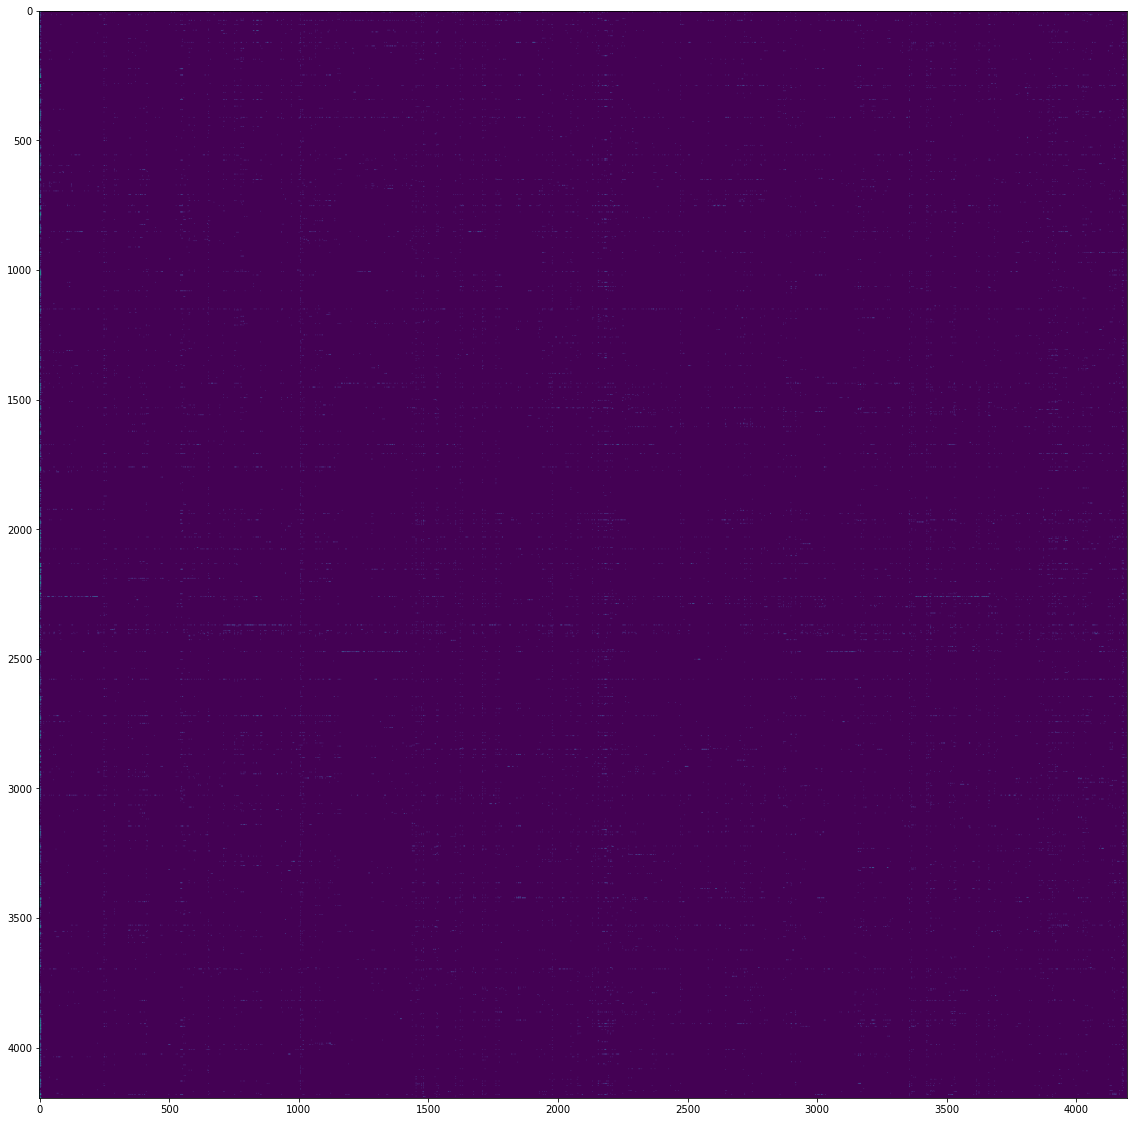

In [28]:
plt.figure(figsize=(20,20))
plt.imshow(P**(1/10000))

In [29]:
srez = 5000
dimentional_matrix_prob = 50

encoding_dict = {item: index for index, item in enumerate(syllables_sort[:srez])}
encode_func = np.vectorize(lambda x: encoding_dict.get(x, 0))
decoding_dict = dict(enumerate(syllables_sort[:srez]))
decode_func = np.vectorize(lambda x: decoding_dict.get(x, 0))

In [30]:
text_to_syllables_encode = encode_func(text_to_syllables)

syllables_n = len(syllables_sort[:srez])

A = np.zeros((syllables_n, syllables_n))

for i in range(len(text_to_syllables_encode)-1):
    j = text_to_syllables_encode[i]
    k = text_to_syllables_encode[i+1]
    A[j][k] = A[j][k] + 1

pi = syllables_counts_sort[:srez]/syllables_counts_sort.sum()
P = A/A.sum(axis=0)

pi1 = pi[:dimentional_matrix_prob]/np.sum(pi[:dimentional_matrix_prob])

P1 = P[:dimentional_matrix_prob][:, :dimentional_matrix_prob]
P1 = P1/P1.sum(axis=0)

In [31]:
story = []
last_prob_element = 15
pi0 = pi1

for i in range(1, 10000):
    # story.append(np.argmax(np.linalg.matrix_power(P1.T, i) @ pi1))
    
    # story.append(np.random.choice(np.argsort(np.linalg.matrix_power(P1.T, 1) @ pi1)[-10:]))

    pi0 = P1.T @ pi0

    prob = np.sort(pi0)[-last_prob_element:]
    story.append(np.random.choice(np.argsort(pi0)[-last_prob_element:], p=prob/prob.sum()))

print(''.join(decode_func(story)))

уловгоне.эюнеюэюпринивмеомеа поюне не?нежепо не не-с!вылиаваоннионмеэмезаваумиомеэюпо-а оличтоюс!о!ужевмеимиававыновямелалира!козаприюдемевымезадемекоомелаюномедеомиюявыо!миливымиювыочечтоюли!мезазановычеваюмичточеяююмиякомивавачезачточтокоочезазалидеюновы!яо!!явычтозаколичтокодечто!яовамеючемекомевазамиоличтолимеменочтодевавыкоочедео!миозачемечточтоюделичтовызачтоюдедечеяно!юююденочевыкомичтозаномиченозаоде!чтодеядеоми!ли!я!новаваза!вадечемезали!юкоямемичеде!лили!вычтозалиденовычевавычевымиючеокочевывыолиоваюдео!ваяямиоямиюликоюдезали!оюночезалиомивымиминоочтооовадечтоюоличеде!вачтоме!валиюзавачтоя!явызачеяюче!ямелиличезачеювао!дече!!чеваячевычточточтокоюодеячеванозазакочтозанокоюдеюлиявычто!мичтоюликочезаночто!кономимемемивализаюомиюлидевычтоюячевализаюкочтовычтоде!чевымиконозаяю!део!лиювамеючточеозаноозачеюмекомечеомимиювыовыочтоноовамидемеоно!выде!юя!демечечтоно!ванодечеченозаваоваюзаминовамикомеличенодезаюкокоячеконодечтоваваноме!выко!че!ноноюковавамелиночтоваявавычтоделиюноноюдев

In [32]:
with open('tests/example001', 'wb') as f:
    f.write(''.join(decode_func(story)).encode('utf-8'))

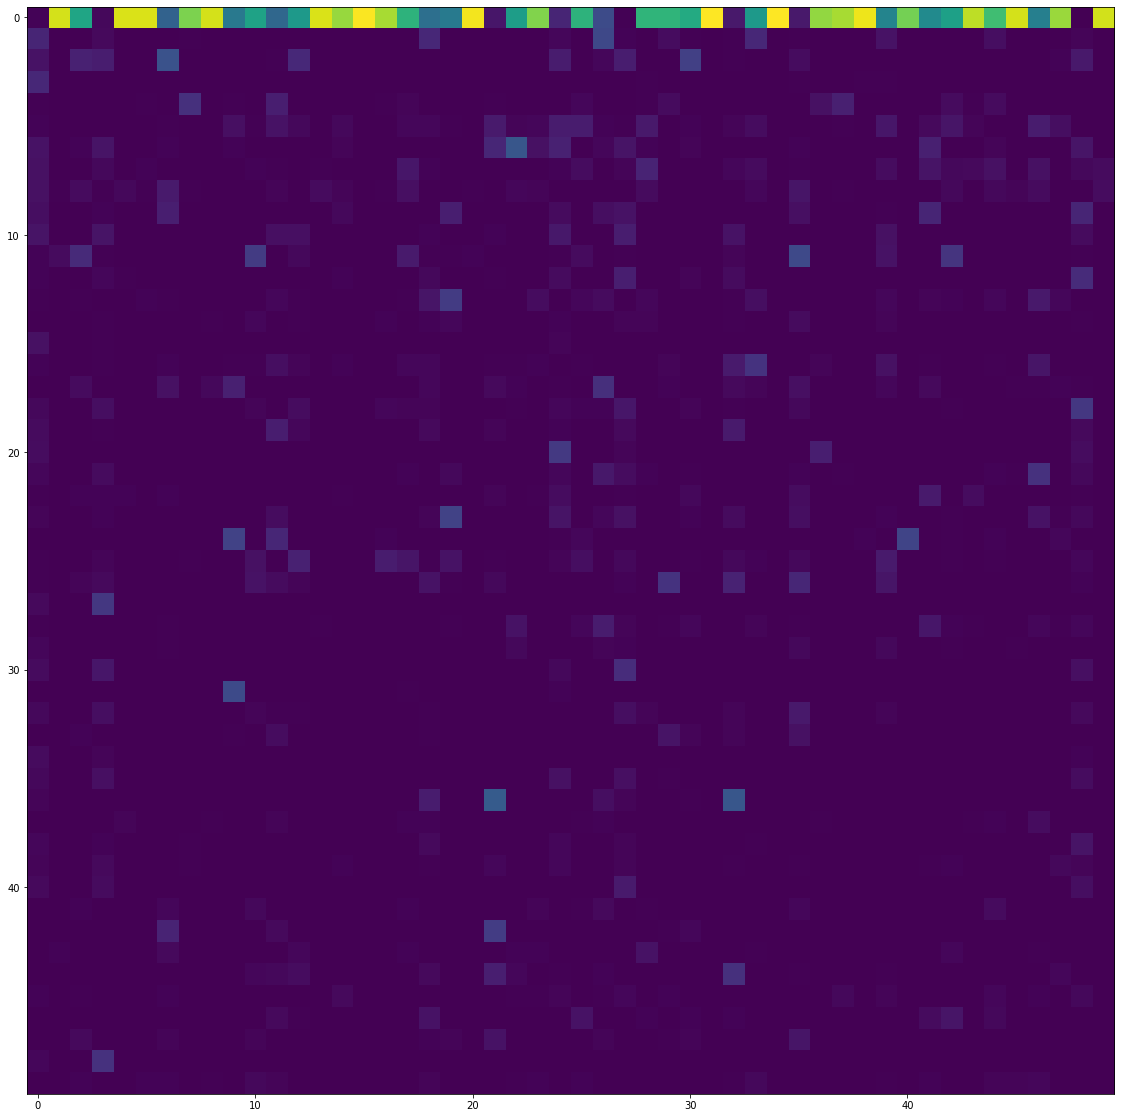

In [33]:
plt.figure(figsize=(20,20))
plt.imshow(P1)

In [34]:
from graphviz import Graph, Digraph

In [97]:
f = Digraph("graph15")
f.attr(rankdir="LR", size="9", title="Markov Chain", labelloc="t")
f.attr("node", shape="circle", color="crimson", fillcolor="crimson", style="filled")
f.attr("edge", color="gainsboro")

for i, weights in enumerate(np.round(P1[:10][:, :10], 2)):
    for j, weight in filter(lambda x: x[-1] > 0, enumerate(weights)):
        f.edge(f"{syllables_sort[i]}", f"{syllables_sort[j]}", label=f"{weight}")

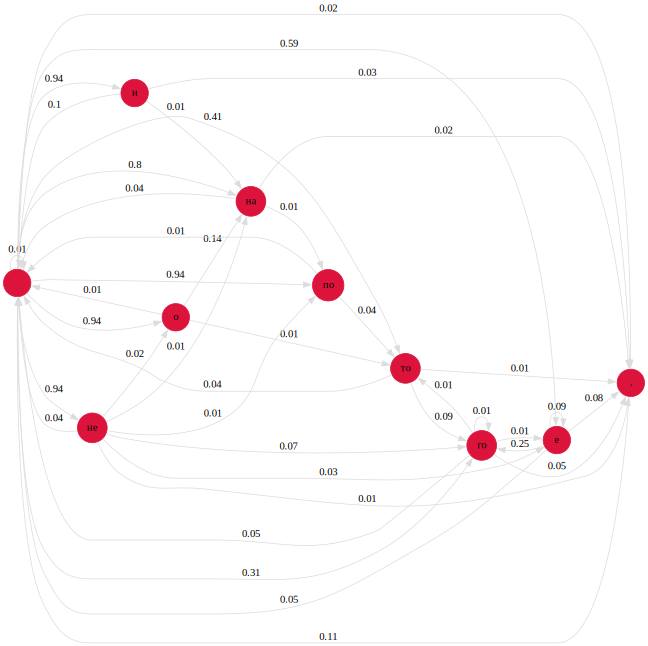

In [98]:
f

In [99]:
f.render('graph15', format='png', directory='/image')

'\\image\\graph15.png'